<center>

**LATTICES**

</center>

<p align="center">
    <img src="https://logowik.com/content/uploads/images/escudo-de-la-universidad-nacional-de-colombia-20163327.logowik.com.webp" width="400">
</p>

<center>

# **✒️Firmas Compactas Post‑Cuánticas Basadas en Retículos NTRU🖋️**

<p align="center">
    <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*h9geYEIsB7cLe0F8x3AHjQ.gif" width="600">
</p>

<center>

<div align="justify">




La criptografía post‑cuántica busca esquemas resistentes a algoritmos cuánticos como Shor. Entre las familias más prometedoras están los protocolos basados en retículos.  

**FALCON** combina:

- Retículos NTRU en el anillo $R_q = \mathbb{Z}_q[X]/(X^N+1)$  
- Muestreo gaussiano discreto con trapdoor (GPV)  
- Aceleración de multiplicaciones de polinomios vía FFT  

El resultado son firmas **muy compactas** (∼700 B para $N=512$, ∼1.3 KB para $N=1024$) y **eficientes** de generar y verificar.

---

**El anillo NTRU y su retículo asociado**

**Anillo**

- Sea $N = 2^k$, $q$ un primo (p.ej. $q=12289$).  
- Definimos  
  $$
    R_q = \mathbb{Z}_q[X]\;\big/\;(X^N + 1).
  $$
- Cada polinomio  
  $$
    a(X)=\sum_{i=0}^{N-1} a_i\,X^i\in R_q
  $$  
  se identifica con el vector de coeficientes  
  $\mathbf a=(a_0,\dots,a_{N-1})\in\mathbb Z_q^N$.

**Retículo NTRU**

- Eligimos dos polinomios secretos  
  $$
    f,g \;\overset{\$}{\leftarrow}\; D_{\mathbb Z,\sigma}^N,
  $$  
  donde $D_{\mathbb Z,\sigma}$ es la gaussiana discreta de desviación $\sigma$.  
- Definimos la clave pública  
  $$
    h \;=\; g\cdot f^{-1}\;\bmod (X^N+1,\,q).
  $$
- El retículo asociado  
  $$
    \Lambda
    = \{(u,v)\in R_q^2 : u + v\,h \equiv 0\pmod q\}
    \;\subset\;\mathbb Z_q^{2N}.
  $$

Este retículo de dimensión $2N$ es la base de la seguridad de FALCON.

---

**Muestreo gaussiano discreto y trapdoor**

**Distribución gaussiana discreta**

Para $k\in\mathbb Z$ definimos
$$
  \rho_\sigma(k) = \exp\bigl(-k^2/(2\sigma^2)\bigr),
  \quad
  D_{\mathbb Z,\sigma}(k) = \frac{\rho_\sigma(k)}{\sum_{z\in\mathbb Z}\rho_\sigma(z)}.
$$

**Base trapdoor en dominio FFT**

1. **FFT** de $f$ y $g$:  
   $$
     \hat f = \mathrm{FFT}(f),
     \quad
     \hat g = \mathrm{FFT}(g).
   $$
2. Calcular inverso puntual  
   $$
     \hat f^{-1} \bmod q.
   $$
3. Formar la matriz en frecuencia
   $$
     B_{\rm FFT}
     = \begin{pmatrix}
         \hat f & -\hat g\\
         0      & q\,\hat f^{-1}
       \end{pmatrix}.
   $$
4. **iFFT** fila a fila para obtener la base trapdoor en coeficientes.

**Algoritmo GPV de muestreo con trapdoor**


Input: ortogonalización ${˜b_i}$ de la base trapdoor, vector objetivo y, desviación $σ$

Output: $z∈Z^n$ distribuido $≈D_{Z^n,σ}$

for i = n downto 1:
  $μ_i = ⟨y,˜b_i⟩ / ∥˜b_i∥²$

  $z_i ← RoundGaussian(μ_i,σ)$
  
  $y ← y − z_i·b_i$

return $z = (z_1,…,z_n)$





</div>

<center>

**📥Instalación paquetes📦**

In [ ]:

!git clone https://github.com/tprest/falcon.py.git
%cd falcon.py


!pip install -q .
!pip install pycryptodome


Cloning into 'falcon.py'...
remote: Enumerating objects: 209, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 209 (delta 59), reused 50 (delta 50), pack-reused 136 (from 1)
Receiving objects: 100% (209/209), 661.85 KiB | 5.21 MiB/s, done.
Resolving deltas: 100% (123/123), done.
/content/falcon.py
ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 22.9 MB/s eta 0:00:00


**📥Importaciones📦**

In [ ]:

import falcon
import time
import hashlib
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import textwrap

**👨‍💻Implementación👩‍💻**

In [ ]:

def load_image(url):
    """
    Downloads an image from the given URL and returns it as a PIL Image object.
    """
    import requests
    from io import BytesIO
    response = requests.get(url)
    return Image.open(BytesIO(response.content))

**👨‍💻Implementación👩‍💻**

In [ ]:

def image_to_bytes(image):
    """
    Converts a PIL Image object to a byte string.
    """
    import io
    with io.BytesIO() as output:
        image.save(output, format="PNG")
        return output.getvalue()

**👨‍💻Implementación👩‍💻**

In [ ]:

def bytes_to_image(byte_string):
    """
    Converts a byte string to a PIL Image object.
    """
    from io import BytesIO
    return Image.open(BytesIO(byte_string))

**👨‍💻Implementación👩‍💻**

In [ ]:

def sign_image(image, secret_key, max_retries=100):

    image_bytes = image_to_bytes(image)
    retry_count = 0
    error_message = None
    while True:
        try:
            signature = secret_key.sign(image_bytes)
            print(f"Signature generated successfully after {retry_count} retries.")
            return signature, error_message
        except ValueError as e:
            if "Squared norm of signature is too large" in str(e):
                retry_count += 1
                print(f"Signature norm too large. Retrying ({retry_count}/{max_retries})...")
                error_message = str(e)
                if retry_count >= max_retries:
                    return None, error_message
            else:
                raise e

**👨‍💻Implementación👩‍💻**

In [ ]:
def verify_image(image, signature, public_key):

    image_bytes = image_to_bytes(image)
    return public_key.verify(image_bytes, signature)

**👨‍💻Implementación👩‍💻**

In [ ]:
def main():
    # Set the security parameter (recommended values: 512, 1024)
    n = 1024  # Revert to a supported security parameter

    # Generate a secret key and the corresponding public key
    secret_key = falcon.SecretKey(n)
    public_key = falcon.PublicKey(secret_key)

    # Load a sample image from the URL
    image_url = "https://picsum.photos/200/300"
    image = load_image(image_url)

    # Sign the image
    start_time = time.time()
    signature, error_message = sign_image(image, secret_key)
    sign_time = time.time() - start_time

    # Create a results table
    table = PrettyTable()
    table.field_names = ["Metric", "Value", "Explanation"]
    table.align["Metric"] = "l"
    table.align["Value"] = "l"
    table.align["Explanation"] = "l"

    # Add algorithm metrics to the results table
    table.add_row(["Algorithm", "Falcon", "The name of the post-quantum signature algorithm used"])
    table.add_row(["Security Parameter (n)", n, "The security parameter used for key generation"])
    table.add_row(["Signature Time", f"{sign_time:.6f} seconds", "The time taken to generate the signature"])

    if signature is not None:
        # Verify the signature
        start_time = time.time()
        is_valid = verify_image(image, signature, public_key)
        verify_time = time.time() - start_time

        # Add signature-related metrics to the results table
        table.add_row(["Signature Length", len(signature), "The length of the generated signature in bytes"])
        table.add_row(["Verification Time", f"{verify_time:.6f} seconds", "The time taken to verify the signature"])
        table.add_row(["Is Signature Valid?", is_valid, "Indicates whether the signature is valid for the original image"])

        # Perform additional checks
        signature_hex = signature.hex()
        signature_hex_wrapped = '\n'.join(textwrap.wrap(signature_hex, width=64))
        table.add_row(["Signature Hex Representation", signature_hex_wrapped, "The hexadecimal representation of the signature"])

        # Load a different image
        different_image_url = "https://picsum.photos/200/300?random=1"
        different_image = load_image(different_image_url)

        # Verify signature with the different image
        is_different_image_valid = verify_image(different_image, signature, public_key)
        table.add_row(["Is Different Image Valid?", is_different_image_valid, "Checks if the signature is valid for a different image (should be False)"])

        # Create a tampered image
        tampered_image = image.copy()
        tampered_image.putpixel((0, 0), (255, 0, 0))

        # Verify signature with the tampered image
        is_tampered_image_valid = verify_image(tampered_image, signature, public_key)
        table.add_row(["Is Tampered Image Valid?", is_tampered_image_valid, "Checks if the signature is valid for a tampered image (should be False)"])
    else:
        # Add error message to the table if signature generation failed
        table.add_row(["Error Message", error_message, "The error message encountered during signature generation"])

    # Display the original image
    print("Original Image:")
    plt.imshow(image)
    plt.show()

    # Display the different image
    if signature is not None:
        print("Different Image:")
        plt.imshow(different_image)
        plt.show()

        # Display the tampered image
        print("Tampered Image:")
        plt.imshow(tampered_image)
        plt.show()

    # Print the results table
    print(table)

**👨‍💻Implementación👩‍💻**

Signature generated successfully after 0 retries.
Squared norm of signature is too large: 12785977913
Squared norm of signature is too large: 12882968161
Original Image:


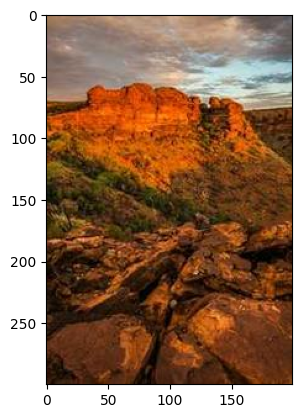

Different Image:


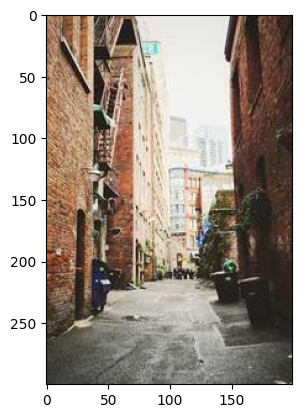

Tampered Image:


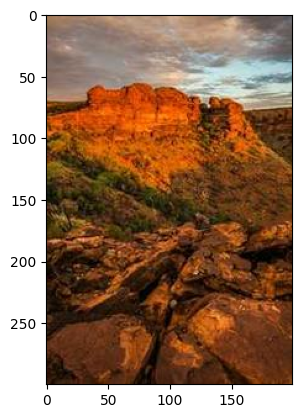

+------------------------------+------------------------------------------------------------------+--------------------------------------------------------------------------+
| Metric                       | Value                                                            | Explanation                                                              |
+------------------------------+------------------------------------------------------------------+--------------------------------------------------------------------------+
| Algorithm                    | Falcon                                                           | The name of the post-quantum signature algorithm used                    |
| Security Parameter (n)       | 1024                                                             | The security parameter used for key generation                           |
| Signature Time               | 0.086059 seconds                                                 | The time taken to generat

In [ ]:
if __name__ == "__main__":
    main()